<H1 style="background-color:Tomato;" ><CENTER>FAKE-NEWS-DETECTION-ML-DL-PROJECT</CENTER></H1>

In [2]:
import IPython
print('Done')

Done


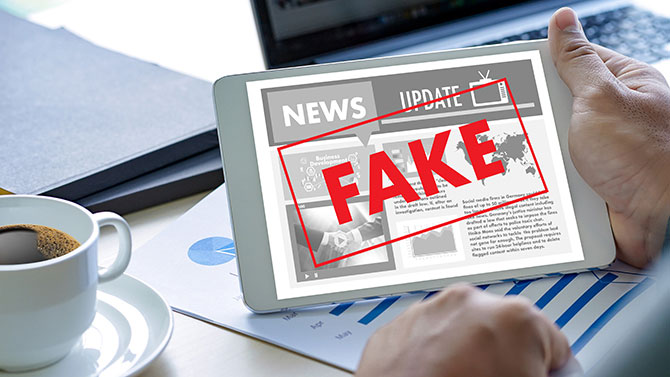

In [3]:
IPython.display.Image('https://content.kaspersky-labs.com/se/com/content/en-global/images/repository/isc/2021/how-to-identify-fake-news-1/how-to-identify-fake-news-1.jpg')

![image.png](attachment:899afe99-8b9d-4e96-90a0-26b0f276e923.png)

# Road Map
- Important Libraries/ Modules
- Data Load
- Data Preprocessing:
  - Feature Engineering
  - EDA
      - Outliers Detection/Remove
      - ML + DL:- Stopwords,Stem
- Model Creation
- Multiple Model Creation
- Compare Multiple Model
- Best Model
- Model Save
- Predict test
- Website Template
- Real + Fake
-  Github

# IMPORTING NECESSARY LIBRARIES

In [9]:
import numpy as np
import pandas as pd
import re, os, nltk # regular-expression
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import kagglehub
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
print('All Module Loaded Successfully!!')


import time
from plyer import notification


def notify_me():
    if __name__ == "__main__":  # safe mode
        time.sleep(5)
        notification.notify(title = "Code Executed Successfully",message="Check Your Notebook" ,timeout=2)
    		# waiting time
		


All Module Loaded Successfully!!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# LOADING DATASET FILE

In [12]:
# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

# path = r'C:\Users\Admin\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77'


Path to dataset files: C:\Users\salma\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77


In [14]:
path

'C:\\Users\\salma\\.cache\\kagglehub\\datasets\\saurabhshahane\\fake-news-classification\\versions\\77'

In [15]:
df = pd.read_csv(path+'/WELFake_Dataset.csv')
print('DataFrame Loaded Successfully!!')

DataFrame Loaded Successfully!!


In [16]:
df.head(2)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1


In [17]:
# here we can see that there is an unwanted col which is Unnamed: 0, we will going to drop this

# Drop Unnamed: 0 Column

In [19]:
df.drop('Unnamed: 0',axis=1, inplace = True)   # inplace will make changes in original File
print('Column Droped Successfully!!')

Column Droped Successfully!!


In [20]:
df.head(2)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1


# EXPLORATORY DATA ANALYSIS

In [23]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [24]:
df.tail()

,title,text,label
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [25]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [26]:
df.shape

(72134, 3)

In [27]:
df.size

216402

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
# what is title
df.iloc[0,0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [30]:
# what is text
df.iloc[0,1][:250]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and ki'

In [31]:
# what is label
df.iloc[0,2]

# 1:- Real news
# 0:- Fake news

1

# Checking Missing Values

In [33]:
df.isna().sum().reset_index()

,index,0
0,title,558
1,text,39
2,label,0


# Checking Missing Values %

In [36]:
((df.isna().sum() /len(df))*100).reset_index()

# missing values does not even more than 1%, we will drop all nan values rows

,index,0
0,title,0.773560
1,text,0.054066
2,label,0.000000


# DROPPING MISSING VALUES

In [39]:
df.dropna(inplace = True)
print('nan rows deleted successfully!!')

nan rows deleted successfully!!


In [40]:
df.shape

(71537, 3)

In [42]:
df.isna().sum().reset_index()

,index,0
0,title,0
1,text,0
2,label,0


# Column wise Analysis

In [45]:
df['title'].value_counts().reset_index()

,title,count
0,Factbox: Trump fills top jobs for his administ...,14
1,Factbox: Contenders for senior jobs in Trump's...,8
2,Get Ready For Civil Unrest: Survey Finds That ...,8
3,Highlights: The Trump presidency on April 13 a...,8
4,The Dark Agenda Behind Globalism And Open Borders,7
...,...,...
62303,"Trump speaks to Qatar emir on Gulf unity, terr...",1
62304,Eric Trump: Hispanics ‘Can’t Wait’ For My Dad...,1
62305,Population of Vertebrate Animals Fell 58% From...,1
62306,Italy's Renzi pledges to hike budget deficit i...,1


In [46]:
df[df.duplicated()].shape

(8416, 3)

In [47]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [48]:
df1 = df.drop_duplicates('title',keep='first')

In [49]:
df2 = df1.drop_duplicates('text',keep='first')

In [50]:
for i in df2:
    print(df2[i].nunique())

61393
61393
2


In [51]:
# for i in df:
#     print(df[i].nunique())

In [52]:
# After check and droping duplicates we will continue with df2

In [53]:
df2.shape

(61393, 3)

# VISUALIZATION

In [56]:
label_df = df2['label'].value_counts().reset_index()
label_df

,label,count
0,0,34237
1,1,27156


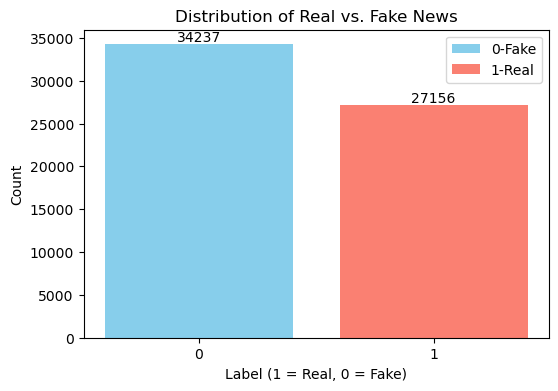

In [57]:
plt.figure(figsize=(6, 4))
ax = plt.bar(label_df['label'],label_df['count'],color = ['skyblue', 'salmon'],label  = ['0-Fake','1-Real'])
plt.title('Distribution of Real vs. Fake News')
plt.xlabel('Label (1 = Real, 0 = Fake)')
plt.ylabel('Count')
plt.xticks(range(0,2),rotation=0)
plt.legend()
plt.bar_label(ax)
plt.show()

# TEXT PRE-PROCESSING

In [60]:
def pre_process(title):
    title = re.sub(r'[^a-zA-Z]',' ',title)    # REMOVING SPECIAL CHARACTERS
    title = re.sub(r'\s+',' ',title)          # REMOVING WHITE SPACES
    title = title.lower()                     # LOWERING ALL CHARACTERS
    return title

In [61]:
data = 'REMOVING SPECIAL $$      CHARACTERS'
pt = r'[^a-zA-Z]'

re.findall(pt,data)
re.sub(pt,' ',data)

'REMOVING SPECIAL         CHARACTERS'

In [62]:
re.sub(r'\s+',' ',data)

'REMOVING SPECIAL $$ CHARACTERS'

In [63]:
pre_process('EMOVING SPECIAL $$      CHARACTERS !@#$%^& ewwh     hgcg')

'emoving special characters ewwh hgcg'

In [64]:
df2['new_title']  = df2['title'].apply(pre_process)

In [65]:
df2.head()

,title,text,label,new_title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement on high alert following threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable obama s attorney general says mos...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobby jindal raised hindu uses story of christ...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan russia unvelis an image of its terrifyin...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,about time christian group sues amazon and spl...


In [68]:
ps = PorterStemmer()
def stemming(text):
    text = text.split()                                                       # SPLITTING THE STRING
    stop_words = stopwords.words('english')                                   # REMOVING STOPWORDS
    text = [ps.stem(word) for word in text if word not in stop_words]         # APPLYING PORTER STEMMING
    text = ' '.join(text)
    return text


In [69]:
data = 'This is a Python class'
data.split()

['This', 'is', 'a', 'Python', 'class']

In [70]:
stop_words = stopwords.words('english')

In [72]:
' '.join([ps.stem(word) for word in data.lower().split() if word not in stop_words ])

'python class'

In [74]:
ps.stem('walked')  # root word

'walk'

In [75]:
df2['new_title'] = df2['new_title'].apply(stemming)

In [76]:
df2.head(3)

,title,text,label,new_title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforc high alert follow threat cop white ...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbeliev obama attorney gener say charlott rio...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobbi jindal rais hindu use stori christian co...


# DROPPING UNNECESSARY COLUMNS

In [78]:
df2 = df2.drop(['title','text'],axis=1)               # DROPPING UNNECESSARY COLUMNS
df2

,label,new_title
0,1,law enforc high alert follow threat cop white ...
2,1,unbeliev obama attorney gener say charlott rio...
3,0,bobbi jindal rais hindu use stori christian co...
4,1,satan russia unv imag terrifi new supernuk wes...
5,1,time christian group sue amazon splc design ha...
...,...,...
72127,1,wikileak email show clinton foundat fund use l...
72129,0,russian steal research trump hack u democrat p...
72130,1,watch giuliani demand democrat apolog trump ra...
72131,0,migrant refus leav train refuge camp hungari


In [79]:
df2.sample()

,label,new_title
16012,0,leonard litwin new york real estat mogul die n...


In [80]:
all_words = ' '.join(df2['new_title'])

In [81]:
all_words[:100]

'law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video unbeliev obama atto'

In [82]:
# pip install wordcloud

In [83]:
from wordcloud import WordCloud

Done


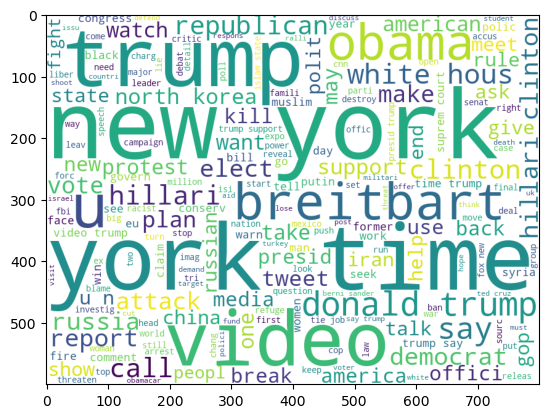

In [84]:
plt.imshow(WordCloud(background_color = 'white',width = 800,height=600).generate(all_words))
print('Done')

# X and Y Data Creation

In [87]:
df2.head()

,label,new_title
0,1,law enforc high alert follow threat cop white ...
2,1,unbeliev obama attorney gener say charlott rio...
3,0,bobbi jindal rais hindu use stori christian co...
4,1,satan russia unv imag terrifi new supernuk wes...
5,1,time christian group sue amazon splc design ha...


In [88]:
X = df2['new_title']
y = df2['label']

X.shape,y.shape

((61393,), (61393,))

In [89]:
vector = TfidfVectorizer()
vector = vector.fit(X)
X = vector.transform(X)

In [208]:
# Just for experiment

In [224]:
vector.transform([df2['new_title'][0]])

<1x19374 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [218]:
X_test.shape

(12279, 19374)

In [91]:
df2['new_title'].values

array(['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
       'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
       'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
       ..., 'watch giuliani demand democrat apolog trump racist birther',
       'migrant refus leav train refuge camp hungari',
       'trump tussl give unpopular mexican leader much need shot arm'],
      dtype=object)

In [100]:
df2['label'].to_numpy()

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [108]:
X.toarray().shape

(61393, 19374)

In [111]:
X.shape

(61393, 19374)

In [114]:
y.shape

(61393,)

In [116]:
# 10 class :- maths
# 100 questions:-  paper:- 20 questions:
# 20 questions:- maths score:- 100%



# -- paper
# 80 questions:- 20 questions
# 100 questionsL- 30 questions:- dekhe

# 90% maths:-



# train test split:-
#  train part 80%
#  test part 20%

# Train Test Split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state=42)
print('Done')

Done


In [124]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49114, 19374)
(12279, 19374)
(49114,)
(12279,)


In [125]:
df2.shape

(61393, 2)

In [126]:
61393*0.8
61393*0.2

12278.6

# Multiple Model Create

In [136]:
# from platform import machine
# # Problem:- nature:- regression, Classification
# # Classification
# 1. Logistic Regression
# 2. Decision Tree
# 3. Random Forest
# 4. SVM:- Support Vector machine
# 5. KNN:- K- Nearest Neghbours

# Import ML Models

# LogisticRegression

In [148]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)  # training data

LogisticRegression()

In [206]:
lr_model.predict([X_test.toarray()[0]])

array([1], dtype=int64)

In [149]:
# Predict y_pred value based on X_test
y_pred_lr = lr_model.predict(X_test)  # test data:- question X_test
print(y_pred_lr)

[1 0 1 ... 1 1 0]


In [150]:
# Model Accuracy Score

test_score =lr_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 88 %


In [151]:
# Model Accuracy Score

train_score =lr_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 92 %


In [152]:
# confusion Matrix, classification score

In [153]:
from sklearn.metrics import confusion_matrix, classification_report

In [154]:
confusion_matrix(y_test,y_pred_lr).astype('int')

array([[6205,  643],
       [ 774, 4657]])

In [155]:
import seaborn as sns

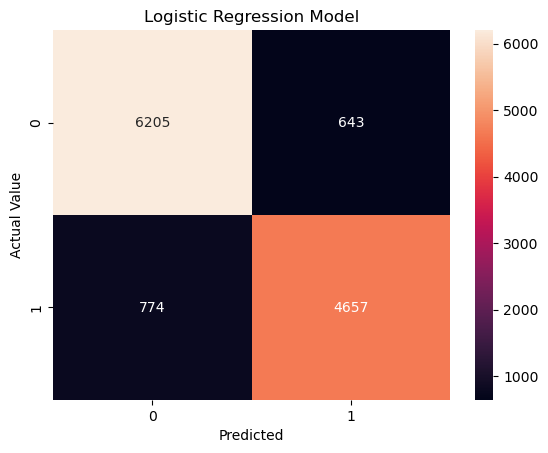

In [156]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot = True,fmt = '0g')
plt.title('Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

# Classification Report

In [158]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6848
           1       0.88      0.86      0.87      5431

    accuracy                           0.88     12279
   macro avg       0.88      0.88      0.88     12279
weighted avg       0.88      0.88      0.88     12279



In [159]:
print('All Done')

All Done


# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test)

In [122]:
print(y_pred_dt)

[1 0 1 ... 1 1 0]


In [123]:
# pip install plyer

In [125]:
# Model Accuracy Score

test_score =dt_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 84 %


In [126]:
# Model Accuracy Score

train_score =dt_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 100 %


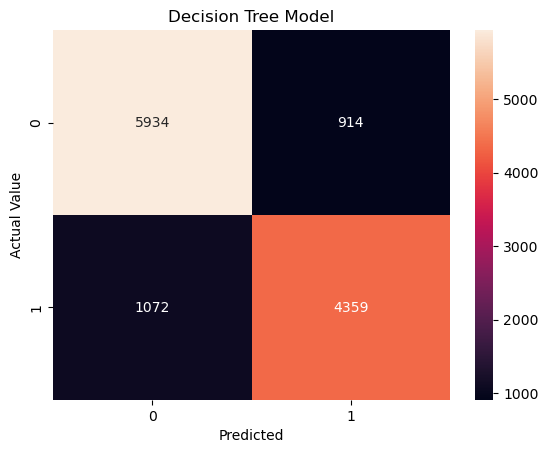

In [127]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot = True,fmt = '0g')
plt.title('Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [128]:
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6848
           1       0.83      0.80      0.81      5431

    accuracy                           0.84     12279
   macro avg       0.84      0.83      0.84     12279
weighted avg       0.84      0.84      0.84     12279



# Random Forest Model

In [131]:
from sklearn.ensemble import RandomForestClassifier
# Bagging:- Bags:- Decision trees Model


rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

notify_me()

In [132]:
y_pred_rf = rf_model.predict(X_test)

In [133]:
# Model Accuracy Score

test_score =rf_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 88 %


In [134]:
# Model Accuracy Score

train_score =rf_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 100 %


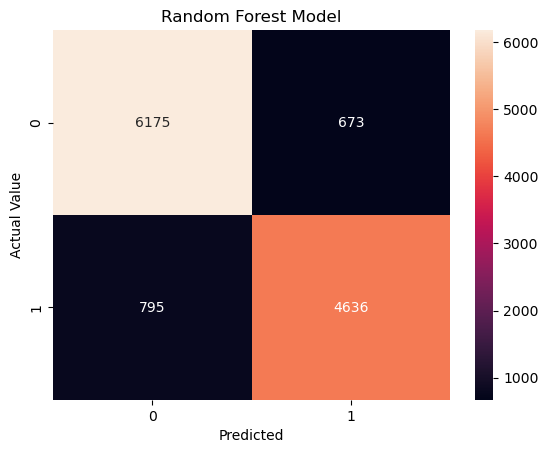

In [135]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot = True,fmt = '0g')
plt.title('Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [136]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6848
           1       0.87      0.85      0.86      5431

    accuracy                           0.88     12279
   macro avg       0.88      0.88      0.88     12279
weighted avg       0.88      0.88      0.88     12279



# SVM:- Support Vector machine

In [139]:
from sklearn.svm import SVC
print('Done')

Done


In [140]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
notify_me()

In [141]:
y_pred_svc = svc_model.predict(X_test)

In [142]:
# Model Accuracy Score

test_score =svc_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 89 %


In [143]:
# Model Accuracy Score

train_score =svc_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 98 %


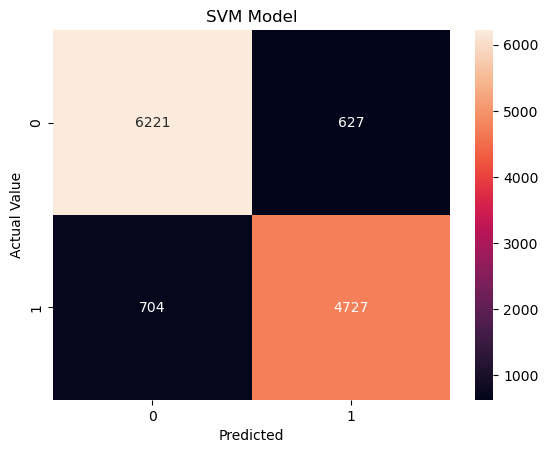

In [144]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot = True,fmt = '0g')
plt.title('SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [145]:
print(classification_report(y_test,y_pred_svc))


              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6848
           1       0.88      0.87      0.88      5431

    accuracy                           0.89     12279
   macro avg       0.89      0.89      0.89     12279
weighted avg       0.89      0.89      0.89     12279



# KNN:- K- Nearest Neighbors

In [148]:
# K:- kitna:- no of nearest neighbors

In [149]:
from sklearn.neighbors import KNeighborsClassifier
print('Done')

Done


In [150]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train,y_train)
notify_me()

In [151]:
y_pred_knn = knn_model.predict(X_test)

In [152]:
# Model Accuracy Score

test_score =knn_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 48 %


In [153]:
# Model Accuracy Score

train_score =knn_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 51 %


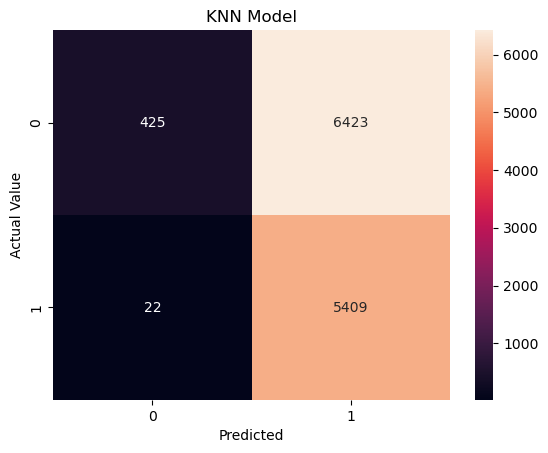

In [154]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot = True,fmt = '0g')
plt.title('KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [308]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.06      0.12      6848
           1       0.46      1.00      0.63      5431

    accuracy                           0.48     12279
   macro avg       0.70      0.53      0.37     12279
weighted avg       0.73      0.48      0.34     12279



In [156]:
# Boosting Alogos, Adaboost, gradboost, XGboost
# Cross val score
# Best Model Konsa
# Save Best Model
# Website
# Live

In [157]:
a = np.random.randint(1,25,27)
a

array([21,  4, 16, 17, 24,  6,  8,  4, 17,  9,  7, 21,  9,  8, 12,  3,  5,
        3,  8, 19, 11, 17,  2, 10,  4,  3,  4])

In [158]:
# 3 x 9
# 9 x 3
# 3 x 3 x 3
# 27 x 1
# 1 x 27

In [159]:
print(a)

[21  4 16 17 24  6  8  4 17  9  7 21  9  8 12  3  5  3  8 19 11 17  2 10
  4  3  4]


In [160]:
a.shape

(27,)

In [161]:
a.reshape((3,9))

array([[21,  4, 16, 17, 24,  6,  8,  4, 17],
       [ 9,  7, 21,  9,  8, 12,  3,  5,  3],
       [ 8, 19, 11, 17,  2, 10,  4,  3,  4]])

In [162]:
a.reshape((3,-1))

array([[21,  4, 16, 17, 24,  6,  8,  4, 17],
       [ 9,  7, 21,  9,  8, 12,  3,  5,  3],
       [ 8, 19, 11, 17,  2, 10,  4,  3,  4]])

In [165]:
a.reshape((-1,9))

array([[21,  4, 16, 17, 24,  6,  8,  4, 17],
       [ 9,  7, 21,  9,  8, 12,  3,  5,  3],
       [ 8, 19, 11, 17,  2, 10,  4,  3,  4]])

In [168]:
a.reshape((9,-1))

array([[21,  4, 16],
       [17, 24,  6],
       [ 8,  4, 17],
       [ 9,  7, 21],
       [ 9,  8, 12],
       [ 3,  5,  3],
       [ 8, 19, 11],
       [17,  2, 10],
       [ 4,  3,  4]])

In [173]:
a.reshape((3,3,-1))

array([[[21,  4, 16],
        [17, 24,  6],
        [ 8,  4, 17]],

       [[ 9,  7, 21],
        [ 9,  8, 12],
        [ 3,  5,  3]],

       [[ 8, 19, 11],
        [17,  2, 10],
        [ 4,  3,  4]]])

In [178]:
a.reshape((1,-1))

array([[21,  4, 16, 17, 24,  6,  8,  4, 17,  9,  7, 21,  9,  8, 12,  3,
         5,  3,  8, 19, 11, 17,  2, 10,  4,  3,  4]])

In [182]:
a.reshape((-1,1))

array([[21],
       [ 4],
       [16],
       [17],
       [24],
       [ 6],
       [ 8],
       [ 4],
       [17],
       [ 9],
       [ 7],
       [21],
       [ 9],
       [ 8],
       [12],
       [ 3],
       [ 5],
       [ 3],
       [ 8],
       [19],
       [11],
       [17],
       [ 2],
       [10],
       [ 4],
       [ 3],
       [ 4]])

In [285]:
print('Final Done1')

Final Done1


# Boosting Alogos, Adaboost, gradboost, XGboost

# GradientBoostingClassifier

In [289]:
from sklearn.ensemble import GradientBoostingClassifier

In [318]:
grad_boost_model = GradientBoostingClassifier(max_depth=5,n_estimators=200,random_state=0)
grad_boost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=0)

In [319]:
y_pred_grad_boost = grad_boost_model.predict(X_test)

In [320]:
# Model Accuracy Score

test_score =grad_boost_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 83 %


In [321]:
# Model Accuracy Score

train_score =grad_boost_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 86 %


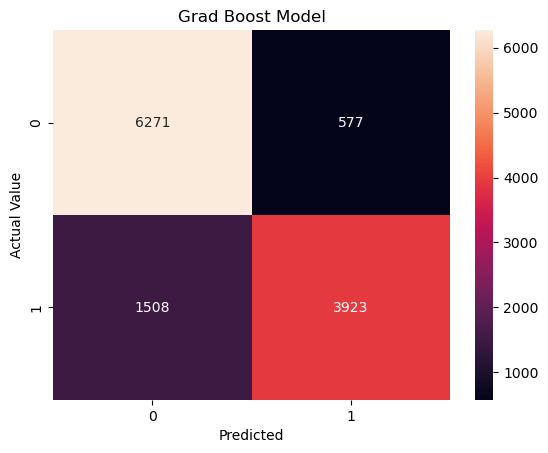

In [322]:
sns.heatmap(confusion_matrix(y_test,y_pred_grad_boost),annot = True,fmt = '0g')
plt.title('Grad Boost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [323]:
print(classification_report(y_test,y_pred_grad_boost))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      6848
           1       0.87      0.72      0.79      5431

    accuracy                           0.83     12279
   macro avg       0.84      0.82      0.82     12279
weighted avg       0.84      0.83      0.83     12279



# AdaBoostClassifier

In [332]:
from sklearn.ensemble import AdaBoostClassifier

In [422]:
ada_boost_model = AdaBoostClassifier(estimator=LogisticRegression(),n_estimators=1000, algorithm='SAMME', random_state=42,learning_rate=1)

In [424]:
ada_boost_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=LogisticRegression(),
                   learning_rate=1, n_estimators=1000, random_state=42)

In [425]:
y_pred_ada_boost = ada_boost_model.predict(X_test)

In [426]:
# Model Accuracy Score

test_score =ada_boost_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 85 %


In [427]:
# Model Accuracy Score

train_score =ada_boost_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 92 %


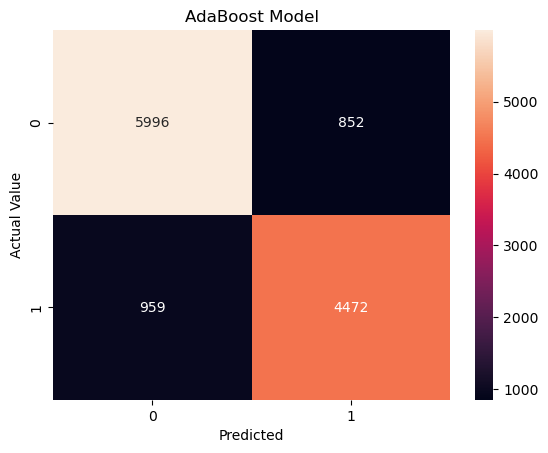

In [428]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada_boost),annot = True,fmt = '0g')
plt.title('AdaBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [475]:
print(classification_report(y_test,y_pred_ada_boost))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6848
           1       0.84      0.82      0.83      5431

    accuracy                           0.85     12279
   macro avg       0.85      0.85      0.85     12279
weighted avg       0.85      0.85      0.85     12279



In [441]:
# pip install xgboost
print('Model Installed Successfully!!')

Model Installed Successfully!!


# XGBoost Classifier

In [443]:
import xgboost as xgb
print('Done')

Done


In [497]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',learning_rate=1,n_estimators=1000,booster='gbtree')

In [499]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [500]:
y_pred_xgb_model = xgb_model.predict(X_test)

In [501]:
# Model Accuracy Score

test_score =xgb_model.score(X_test,y_test)  # Actual Paper Score
# print('Actual Score: ',round(test_score*100),'%')
print(f'Actual Score is: {round(test_score*100)} %')

Actual Score is: 88 %


In [502]:
# Model Accuracy Score

train_score =xgb_model.score(X_train,y_train)  # Mock Paper Score
print(f'Actual Score is: {round(train_score*100)} %')

Actual Score is: 99 %


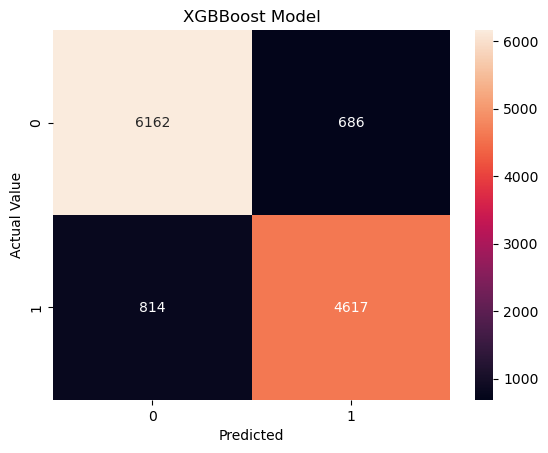

In [503]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb_model),annot = True,fmt = '0g')
plt.title('XGBBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.show()

In [504]:
print(classification_report(y_test,y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6848
           1       0.87      0.85      0.86      5431

    accuracy                           0.88     12279
   macro avg       0.88      0.87      0.88     12279
weighted avg       0.88      0.88      0.88     12279



In [512]:
# DataFrame:- Model name, Model Testing Accuracy, Type1,Type2 error, Time taken by each model training

In [514]:
import time

start_time = time.time()
xgb_model = xgb.XGBClassifier(objective='binary:logistic',learning_rate=1,n_estimators=1000,booster='gbtree')
xgb_model.fit(X_train,y_train)

end_time = time.time()

time_taken = end_time - start_time
print(time_taken)

102.21700739860535


In [523]:
cm = confusion_matrix(y_test,y_pred_xgb_model).flatten()

In [536]:
t2, t1 = cm[1],cm[2]
t1,t2

(814, 686)

In [ ]:
# Logistic Regression
# 2. Decision Tree
# 3. Random Forest
# 4. SVM:- Support Vector machine
# 5. KNN:- K- Nearest Neighbour

In [565]:
all_model_names = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine(SVM)',
                   'K- Nearest Neighbour(KNN)','GradientBoosting','AdaBoost','XGBoost']
# print('Total Models',len(all_model_names))


all_model_objects = [lr_model,dt_model,rf_model,svc_model,knn_model,grad_boost_model,ada_boost_model,xgb_model]

all_model_test_score = []
all_model_y_pred = []
all_model_Type_1_error = []
all_model_Type_2_error = []



for i,j in zip(all_model_objects,all_model_names):
    all_model_test_score.append(i.score(X_test,y_test))
    temp_y_pred = i.predict(X_test)
    all_model_y_pred.append(temp_y_pred)
    temp_cm = confusion_matrix(y_test,temp_y_pred).flatten()
    t2, t1 = temp_cm[1],temp_cm[2]
    all_model_Type_1_error.append(t1)
    all_model_Type_2_error.append(t2)
    print(f'Model {j} Executed Successfully!!',end='\n'*2)

print('All Model Executed Successfully!!')

Model Logistic Regression Executed Successfully!!

Model Decision Tree Executed Successfully!!

Model Random Forest Executed Successfully!!

Model Support Vector Machine(SVM) Executed Successfully!!

Model K- Nearest Neighbour(KNN) Executed Successfully!!

Model GradientBoosting Executed Successfully!!

Model AdaBoost Executed Successfully!!

Model XGBoost Executed Successfully!!

All Model Executed Successfully!!


In [563]:
# for i,j in zip(all_model_objects,all_model_names):
#     print(f'Model {j} Executed Successfully!!',end='\n'*2)

# All Model Comparison DataFrame

In [577]:
all_model_comp_dict = {'Model Name':all_model_names,
                      'Model Score':all_model_test_score,
                      'Type 1 Error':all_model_Type_1_error,
                      'Type 2 Error':all_model_Type_2_error}


all_model_df = pd.DataFrame(all_model_comp_dict)
all_model_df['Model Score'] = round(all_model_df['Model Score']*100,3)
all_model_df

,Model Name,Model Score,Type 1 Error,Type 2 Error
0,Logistic Regression,88.460,774,643
1,Decision Tree,83.826,1072,914
2,Random Forest,88.045,795,673
3,Support Vector Machine(SVM),89.160,704,627
4,K- Nearest Neighbour(KNN),47.512,22,6423
5,GradientBoosting,83.020,1508,577
6,AdaBoost,85.251,959,852
7,XGBoost,87.784,814,686


# Best Model

In [588]:
all_model_df.sort_values(by = ['Model Score','Type 1 Error'],ascending=False)

,Model Name,Model Score,Type 1 Error,Type 2 Error
3,Support Vector Machine(SVM),89.160,704,627
0,Logistic Regression,88.460,774,643
2,Random Forest,88.045,795,673
7,XGBoost,87.784,814,686
6,AdaBoost,85.251,959,852
1,Decision Tree,83.826,1072,914
5,GradientBoosting,83.020,1508,577
4,K- Nearest Neighbour(KNN),47.512,22,6423


In [597]:
confusion_matrix(y_test,y_pred_lr)

array([[6205,  643],
       [ 774, 4657]], dtype=int64)

# Save the Best Model

In [194]:
import pickle
# Dump best model:- save

with open('best_model.pkl','wb') as f:
    pickle.dump(lr_model,f)
    print('File Saved Successfully!!')

File Saved Successfully!!


In [226]:
with open('vector.pkl','wb') as f:
    pickle.dump(vector,f)
    print('Vector Object Saved Successfully!!')

Vector Object Saved Successfully!!


In [230]:
with open('vector.pkl','rb') as f:
    my_vector = pickle.load(f)

In [232]:
with open('best_model.pkl','rb') as f:
    my_model_brain = pickle.load(f)

In [266]:
my_vector.transform(df2['new_title'].sample().values)

<1x19374 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [268]:
# vector.transform(df2['new_title'].sample().values)

In [282]:
my_model_brain.predict(my_vector.transform(df2['new_title'].sample().values))

array([1], dtype=int64)

In [340]:
news = input('Enter your news: ')

vector_result = my_vector.transform([news])
predict_result = my_model_brain.predict(vector_result)[0]

print('FAKE News') if predict_result == 0 else print('REAL News')

Enter your news:  danni glover appal trump time magazin person year


REAL News


In [312]:
df2.loc[3,'new_title']

'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid'

In [314]:
# df2

In [334]:
df2[df2['label'] == 0].sample()['new_title'].values[0]

'trump consid dalla investor ray washburn interior secretari cnbc'

In [336]:
df2[df2['label'] == 1].sample()['new_title'].values[0]


'danni glover appal trump time magazin person year'

# Deploy this in Website

In [344]:
# Django, Flask, Fastapi
# Streamlit

In [346]:
import streamlit as s
print('Done')

Done


In [354]:
# s.write('This is A ML Introduction Page')

df2.head().to_csv('my_data.csv')
print('Done')

Done
